# Reto: Predicción de BD de Titanic de Kaggle

A través del siguiente programa buscamos predecir si un pasajero a bordo del Titanic tendría posibilidades de sobrevivir dadas ciertas condiciones.

Estaremos utilizando un dataset de Kaggle que se puede encontrar en el siguiente link: https://www.kaggle.com/competitions/titanic

Para empezar, haremos una limpieza de los datos con la finalidad de que el modelo que planteemos pueda aprender de mejor forma y haremos ciertas gráficas y cálculos estadísticos para familiarizarnos de mejor forma y representar los datos de la base de datos.

Procederemos a analizar los datos para eliminar algunas variables que no tendran uso para el modelo que propondremos, asi como crear otras que consideramos importantes y que obtuvimos de la misma base de datos. Aplicamos unas tranformaciones y con eso tendremos mejores datos para entrenar modelos de predicción.

## Extraer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, preprocessing

from google.colab import files,drive

drive.mount("/content/gdrive/")  
# !pwd
# !ls

%cd "/content/gdrive/Shareddrives/Concentracion_AI/Titanic"
# !ls

Mounted at /content/gdrive/
/content/gdrive/Shareddrives/Concentracion_AI/Titanic


Lectura de datos y almacenamiento en un DataFrame.

In [ ]:
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Se usa un describe para conocer información general acerca de los datos.

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Con el objetivo de verificar si existen registros duplicados en la base de datos, eliminamos los duplicados y observamos los datos que quedan posterior a ello.

In [ ]:
def drop_duplicates(df):
  return df.drop_duplicates()
titanic = drop_duplicates(titanic)
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Como se puede observar no existen datos duplicados por lo que la base de datos se mantuvo igual.

Otra parte importante para conocer los datos, es saber si existen valores nulos en algún registro. Para esto consultamos la información del dataframe y obtenemos el porcentaje de valores nulos para cada uno de los datos.

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [ ]:
# Porcentaje de valores faltantes en el dataframe
titanic.isnull().sum()/len(titanic)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Como se puede observar, la columna "Cabin" tiene un 77% de datos faltantes, el siguiente registro con mayor número de datos faltantes es "Age" con 19%, y por último "Embarked" que tiene un muy pequeños porcentaje de datos faltantes de 0.2%

## Transformaciones

Después de analizar los datos con los que contamos, así como la información que nos provee cada columna. Pudimos identificar los datos que requerimos para resolver el problema y poder aplicar modelos analíticos y visualizaciones posteriormente.

#### Limpieza de datos

Los datos incluidos deben ser correctos, inequívocos, consistentes y completos. Es por eso que es importante descartar la información que no sea relevante.


**Eliminar Cabin**

Esta columna cuenta con 77% de datos faltantes para los registros. Por la gran cantidad de datos faltantes la información no sería relevante, por lo que lo mejor es eliminar esta columna ya que no provee demasiada información. 


In [ ]:
def drop_cabin_and_id(df):
  return df.drop(columns=['Cabin', 'PassengerId'])
titanic = drop_cabin_and_id(titanic)
titanic.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


**Eliminar Registros sin Puerta de Embarque Registrada**

La puerta de embarque nos puede ser útil para sacar conclusiones de si hubieron más sobrevivientes dependiendo de la puerta en la que subieron. Esta columna cuenta con 0.22% de datos vacíos; al ser un número muy pequeño lo mejor es eliminar los registros que no tengan esta información. 

Los registros eliminados fueron solamemte 2, por lo que esta limpieza no tiene mayor afectación al conjunto de datos.

In [ ]:
def drop_na_embarked(df):
  return df.dropna(subset=['Embarked'])
titanic = drop_na_embarked(titanic)
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Datos Atípicos**


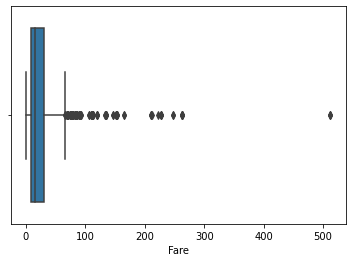

In [ ]:
sns.boxplot(data=titanic, x="Fare")

La tarifa es el único campo que tiene un gran rango de datos, como se puede observar hay un dato que esta muy alejado del resto; pues hay una tarifa de $500. 

Podemos eliminar los registros que contienen una tarifa mayor a 

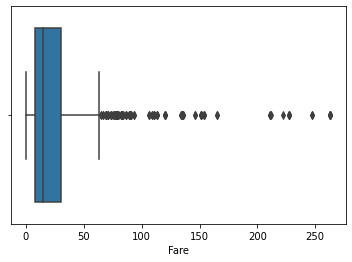

In [ ]:
def drop_outliers_fare(df):
  delete = df[df['Fare'] > 400].index
  return df.drop(delete)

titanic = drop_outliers_fare(titanic)
sns.boxplot(data=titanic, x="Fare")

#### Transformación de datos


**Cambiar la columna del puerto de embarque por 3 columnas dummys**

Utilizamos una función dentro de la libreria de pandas para crear variables dummys en lugar de la variable categorica "Embarked" que ya teniamos, con el fin de poder trabajar de mejor manera en los modelos predictivos.

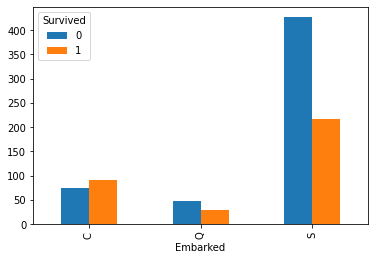

In [ ]:
pd.crosstab(titanic['Embarked'], titanic['Survived']).plot(kind='bar')

Se puede observar cómo el puerto con mayor número de embarques fue Southampton, siendo el puerto con menor tasa de supervivencia.

El único puerto en el que la tasa de supervivencia fue mayor al 50% fue Cherbourg, mientras que en Queenstown fue más parejo que en Sothampton, sin embargo, sigue siendo menor la superivencia.

In [ ]:
def embarked_dummies(df):
  df = pd.concat([df, pd.get_dummies(df["Embarked"])], axis = 1)
  return df.drop('Embarked', axis=1)
titanic = embarked_dummies(titanic)
titanic.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,0,0,1


**Crear columna para saber si pasajero abordó acompañado de alguien**

Las columnas de "Parch" y "Sibp" son relevantes para saber si el pasajero viajaba acompañado, sin embargo por si solas no ofrecen información relevante. Por lo que creamos esta nueva columna que nos indica si un pasajero abordó acompañado o no.

Se asigna un valor de 1 en caso de que se logre identificar que el pasajero abordó  acompañado. Se puede determinar esto si forma parte de una misma compra al tener el mismo ticket o si se sabe por la base de datos que asistió con algún familiar. Se elimina la columna que relaciona al pasajero con padres o hijos y la columna que lo relaciona con hermanos o su matrimonio.

In [ ]:
def boarded_in_group(df):
  is_group = df.duplicated(subset=['Ticket'], keep=False)
  df.loc[is_group == True, 'Group'] = 1
  df.loc[is_group == False, 'Group'] = 0
  df.loc[df['SibSp'] > 0, 'Group'] = 1
  df.loc[df['Parch'] > 0, 'Group'] = 1
  df.drop('SibSp', axis=1, inplace=True)
  df.drop('Parch', axis=1, inplace=True)
  df.drop('Ticket', axis=1, inplace=True)
  return df
titanic = boarded_in_group(titanic)
titanic.head(200)

,Survived,Pclass,Name,Sex,Age,Fare,C,Q,S,Group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,0,1,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0,0,1.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0,1,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,0,0,1,1.0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...
196,0,3,"Mernagh, Mr. Robert",male,NaN,7.7500,0,1,0,0.0
197,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,8.4042,0,0,1,1.0
198,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,7.7500,0,1,0,0.0
199,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,13.0000,0,0,1,0.0


**Cambiar columna de clases (Clase 1 por clase 3, y viceversa)**

Se cambiaron las clases para facilitar la interpretación del modelo, tomando el número de clase como variable directamente relacionada la probabilidad de sobrevivencia. Esto permite facilitar la asignación de pesos a la variable.

In [ ]:
def switch_class(df):
  df["Pclass"] = df["Pclass"].replace(1, "x")
  df["Pclass"] = df["Pclass"].replace(3, 1)
  df["Pclass"] = df["Pclass"].replace("x", 3)
  return df

In [ ]:
titanic = switch_class(titanic)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Fare,C,Q,S,Group
0,0,1,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,0,1,1.0
1,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0,0,1.0
2,1,1,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0,1,0.0
3,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,0,0,1,1.0
4,0,1,"Allen, Mr. William Henry",male,35.0,8.0500,0,0,1,0.0


**Cambiar columna de sexo (cambiar cadena por valores binarios)**

Cambiaremos los valores en cadena por valores numericos para que el modelo pueda utilizarlos y entenderlos de mejor forma. Se asigna un valor de 0 en caso de que sea hombre y un valor de 1 en caso de ser mujer.

In [ ]:
def change_sex(df):
  return df['Sex'].replace(['male', 'female'],[0.0, 1.0], inplace=True)
change_sex(titanic)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Fare,C,Q,S,Group
0,0,1,"Braund, Mr. Owen Harris",0.0,22.0,7.2500,0,0,1,1.0
1,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.0,71.2833,1,0,0,1.0
2,1,1,"Heikkinen, Miss. Laina",1.0,26.0,7.9250,0,0,1,0.0
3,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.0,53.1000,0,0,1,1.0
4,0,1,"Allen, Mr. William Henry",0.0,35.0,8.0500,0,0,1,0.0


**Obtener el título de las personas**

El nombre es un dato irrelevante para el análisis de datos; sin embargo, en esta variable también se incluye el título de la persona. Esto nos puede ser relevante para saber si sobrevivieron más personas dependiendo de su título.

Existen muchos títulos que solo corresponden a una o a un par de personas, lo que no sería muy útil. Investigando acerca de estos títulos se puede obtener información para mapearlos con títulos con mayor número de registros; ya que algunos de estos títulos representan lo mismo tan solo que expresado en un lenguaje diferente.

In [ ]:
def create_title(df):
  for name_string in df['Name']:
    df['Title']=df['Name'].str.extract('([A-Za-z]+)\.',expand=True)

  mapping = {'Capt': 'Mr', 'Col': 'Mr', 'Countess': 'Mrs', 'Don': 'Mr',
           'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Major': 'Mr', 'Mlle': 'Miss',
           'Mme': 'Miss', 'Ms': 'Miss', 'Rev': 'Mr', 'Sir': 'Mr', 'Dr': 'Mr', 
           'Dona': 'Mrs'}
  return df.replace({'Title': mapping}, inplace=True)

create_title(titanic)
titanic.groupby(['Title'])['Name'].count()

Title
Master     40
Miss      184
Mr        536
Mrs       126
Name: Name, dtype: int64

Con esto obtenemos 4 categorías de títulos, lo cual puede ser valioso al momento de realizar el análisis. Y se elimina la columna de nombre ya que no nos da información relevante para el modelo. La información que pudo resultar útil acaba de ser extraída para clasificar al pasajero según su título.

In [ ]:
def dummy_title(df):
  df = pd.concat([df, pd.get_dummies(df["Title"])], axis = 1)
  df.drop(['Title'], axis=1, inplace=True)
  df.drop(['Name'], axis=1, inplace=True)
  return df

titanic = dummy_title(titanic)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Group,Master,Miss,Mr,Mrs
0,0,1,0.0,22.0,7.2500,0,0,1,1.0,0,0,1,0
1,1,3,1.0,38.0,71.2833,1,0,0,1.0,0,0,0,1
2,1,1,1.0,26.0,7.9250,0,0,1,0.0,0,1,0,0
3,1,3,1.0,35.0,53.1000,0,0,1,1.0,0,0,0,1
4,0,1,0.0,35.0,8.0500,0,0,1,0.0,0,0,1,0


**Predecir las edades faltantes con una regresión de Árboles de Decisiones**

In [ ]:
trained_age_model = False
age_model = None

def predict_ages(df):
  predictors = df[["Pclass", "Sex", "Group", "Master", "Miss", "Mr", "Mrs", "Age"]]
  predict_age = predictors.loc[predictors['Age'].isnull()]
  
  global trained_age_model
  # Fit model from train, test will use model fitted from train
  if not trained_age_model:
    train_age = predictors.loc[predictors['Age'].notnull()]
    train_age_X = train_age.drop(['Age'], axis = 1)
    global age_model

    # from sklearn import tree
    # age_model = tree.DecisionTreeRegressor().fit(train_age_X, train_age["Age"])

    # from sklearn.neighbors import KNeighborsRegressor
    # age_model = KNeighborsRegressor(n_neighbors=5).fit(train_age_X, train_age["Age"])
  
    from sklearn.ensemble import RandomForestRegressor
    age_model = RandomForestRegressor().fit(train_age_X, train_age["Age"])
    trained_age_model = True

  predicted_ages = age_model.predict(predict_age.drop(['Age'], axis = 1))
  df.loc[df['Age'].isnull(), "Age"] = predicted_ages
  return df

titanic = predict_ages(titanic)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 890
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  886 non-null    int64  
 1   Pclass    886 non-null    int64  
 2   Sex       886 non-null    float64
 3   Age       886 non-null    float64
 4   Fare      886 non-null    float64
 5   C         886 non-null    uint8  
 6   Q         886 non-null    uint8  
 7   S         886 non-null    uint8  
 8   Group     886 non-null    float64
 9   Master    886 non-null    uint8  
 10  Miss      886 non-null    uint8  
 11  Mr        886 non-null    uint8  
 12  Mrs       886 non-null    uint8  
dtypes: float64(4), int64(2), uint8(7)
memory usage: 54.5 KB


Como se puede observar, ya no existen valores nulos en la columna de edad, pues se lograron predecir edades según el modelo generado para todos los registros que no contaban con este dato.

**Agregar columna con grupos de edad**

Agruparemos a las personas por grupo de edad para poder trabajar mas fácilmente con las categorias. De esta forma se podrá comparar la relación que tienen distintos grupos etarios con el resto de variables con la finalidad de saber si tienen algo que ver con la supervivencia a bordo del Titanic.

In [ ]:
bins=[0, 10, 20, 30, 40, 50, 60, 70, 80]
titanic["AgeGroup"] = pd.cut(x = titanic['Age'],bins = bins,labels = [1,10,20,30,40,50,60,70])
titanic.head()

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Group,Master,Miss,Mr,Mrs,AgeGroup
0,0,1,0.0,22.0,7.2500,0,0,1,1.0,0,0,1,0,20
1,1,3,1.0,38.0,71.2833,1,0,0,1.0,0,0,0,1,30
2,1,1,1.0,26.0,7.9250,0,0,1,0.0,0,1,0,0,20
3,1,3,1.0,35.0,53.1000,0,0,1,1.0,0,0,0,1,30
4,0,1,0.0,35.0,8.0500,0,0,1,0.0,0,0,1,0,30


Función para tratar los datos

In [ ]:
def limpieza_datos(df, train):
  if train:
    df = drop_duplicates(df)
    df = drop_na_embarked(df)
    df = drop_outliers_fare(df)
  df = drop_cabin_and_id(df)
  df = embarked_dummies(df)
  df = boarded_in_group(df)
  df = switch_class(df)
  change_sex(df)
  create_title(df)
  df = dummy_title(df)
  df = predict_ages(df)
  return df.fillna(0)

## Análisis de datos

Text(0.5, 1.0, 'Correlation matrix for the titanic dataset')

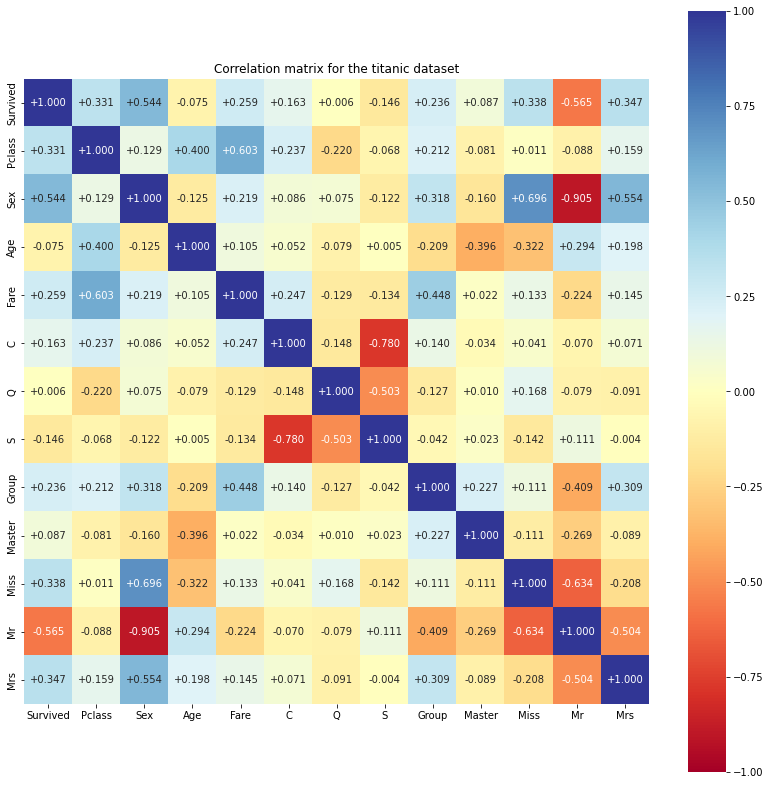

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(titanic.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix for the titanic dataset")

Como se puede observar en el mapa de correlaciones anterior, ciertas variables guardan relación entre sí. Es interesante poder analizar el color que se grafica entre las columnas agregadas tras la limpieza y transformación de los datos dado que se puede ver cómo se genera correlación entre la supervivencia y variables como el puerto de embarque en Cherbourg o si los pasajeros abordaron acompañados al Titanic.

De igual forma se puede observar relaciones obvias como el título para nombrar al pasajero y su edad, como otras no tan obvias como el costo de los boletos con el hecho de que un pasajero llegó acompañado o no.

Al haber generado transformaciones en los datos, se obtuvieron nuevas columnas de datos procesados que muestran tener correlación entre sí y con la supervivencia a bordo del Titanic por lo cuál se espera que el modelo que se vaya a utilizar pueda dar predicciones más acertadas al contar con mayor información.

### Porcentaje de Supervivencia

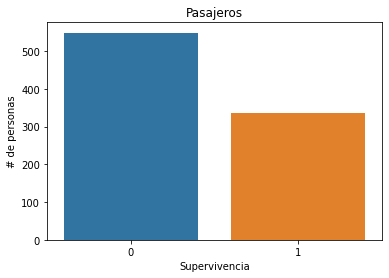

In [ ]:
sns.countplot(data=titanic, x = "Survived")
plt.title('Pasajeros');
plt.xlabel('Supervivencia');
plt.ylabel('# de personas');

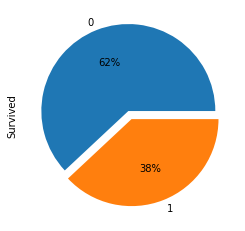

In [ ]:
titanic['Survived'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', explode=(0.05, 0.05))

Como se puede observar en las gráficas superiores, el porcentaje de sobrevivientes es menor al de fallecidos. El 38% de los pasajeros logró sobrevivir a la trajedia por la que pasó el Titanic.

### Sobrevivientes por Sexo y Clase

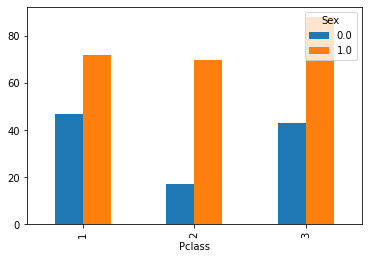

In [ ]:
did_survive = titanic[titanic['Survived'].isin([1])]
pd.crosstab(did_survive['Pclass'], did_survive['Sex']).plot(kind='bar')

En la gráfica anterior se puede observar a todos los sobrevivientes del Titanic registrados en la base de datos divididos según su clase de ticket y sexo. 

Se puede observar cómo el número de supervivientes es semejante entre las diferentes clases, parece que primera clase tiene el mayor número de sobrevivientes, seguido de tercera y por último de segunda. Esto es relevante dado que más de la mitad de los pasajeros viajaban en tercera clase y el número de sobrevivientes es semejante con el resto de clases.

En las tres clases sobrevivieron mayor número de mujeres frente al número de hombres.

### No sobrevivientes por Sexo y Clase

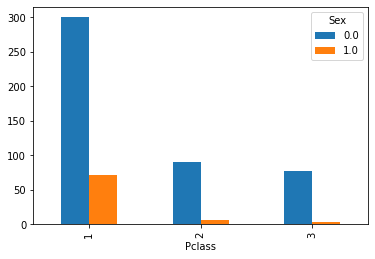

In [ ]:
not_survived = titanic[titanic['Survived'].isin([0])]
pd.crosstab(not_survived['Pclass'], not_survived['Sex']).plot(kind='bar')

En la gráfica se observa a los pasajeros que no lograron sobrevivir divididos según la clase de ticket adquirido y su sexo. Es notable que el número de hombres es mayor frente al de mujeres. En este caso se puede observar cómo la tercera clase fue la más afectada.

### Sobrevivientes por clase

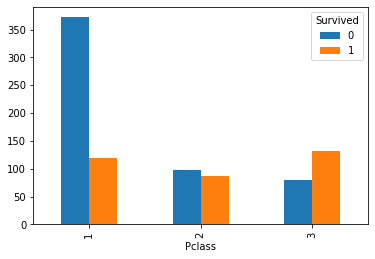

In [ ]:
pd.crosstab(titanic['Pclass'], titanic['Survived']).plot(kind='bar')

En esta última gráfica se puede observar cómo la única clase con mayor número de supervivientes que de fallecidos fue en primera clase, seguido de segunda clase con un número de sobrevivientes y fallecidos similar a pesar de que este último resultó mayor.

En tercera clase se puede observar cómo el número de sobrevivientes fue mucho más pequeño en comparación al número de fallecidos de la misma clase. Pasa la contrario a primera clase, pues el número de fallecidos supera en gran medida al de sobrevivientes.

### Sobrevivientes y no sobrevivientes por género

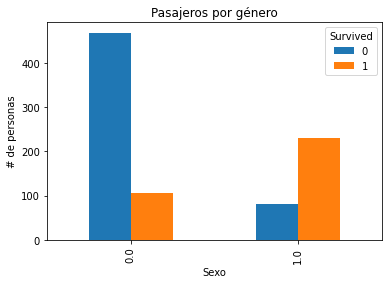

In [ ]:
pd.crosstab(titanic['Sex'], titanic['Survived']).plot.bar()
plt.title('Pasajeros por género');
plt.xlabel('Sexo');
plt.ylabel('# de personas');

La gráfica muestra cómo de la cantidad total de hombres tan solo pocos lograron sobrevivir a diferencia de las mujeres que lograron sobrevivir más de las que no lo hicieron.

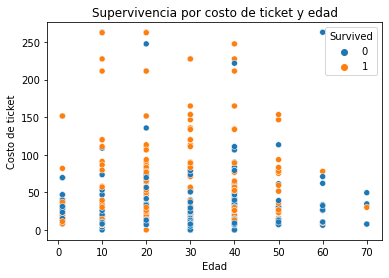

In [ ]:
sns.scatterplot(x = 'AgeGroup', y = 'Fare', data  = titanic, hue = 'Survived')
plt.title('Supervivencia por costo de ticket y edad');
plt.xlabel('Edad');
plt.ylabel('Costo de ticket');

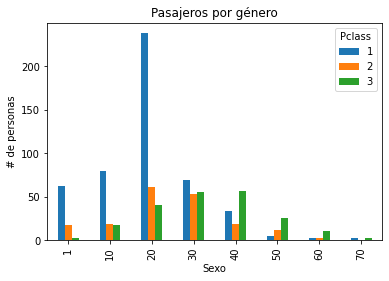

In [ ]:
pd.crosstab(titanic['AgeGroup'], titanic['Pclass']).plot.bar()
plt.title('Pasajeros por género');
plt.xlabel('Sexo');
plt.ylabel('# de personas');

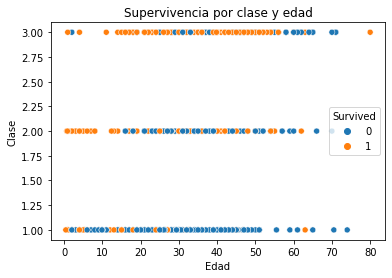

In [ ]:
sns.scatterplot(x = 'Age', y = 'Pclass', data  = titanic, hue = 'Survived')
plt.title('Supervivencia por clase y edad');
plt.xlabel('Edad');
plt.ylabel('Clase');

La gráfica utiliza los distintos grupos etarios creados anteriormente mostrando de color naranja aquellos que sobrevivieron y de azul aquellos que no. En el eje y se evalúa qué tanto pagaron por su boleto.

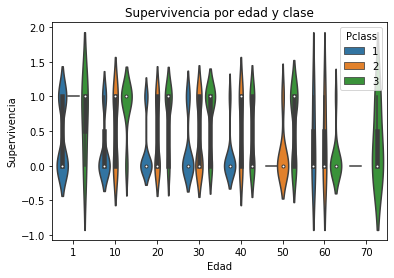

In [ ]:
sns.violinplot(x = 'AgeGroup', y = 'Survived',hue = "Pclass", data  = titanic)
plt.title('Supervivencia por edad y clase');
plt.xlabel('Edad');
plt.ylabel('Supervivencia');

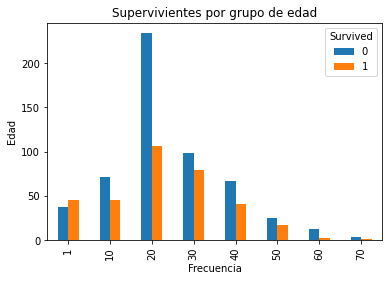

In [ ]:
age_surv = pd.crosstab(titanic['AgeGroup'], titanic['Survived'])
age_surv.plot(kind='bar')
plt.title('Supervivientes por grupo de edad');
plt.xlabel('Frecuencia');
plt.ylabel('Edad');

En la gráfica se observa cómo el único grupo de edad con mayor tasa de supervivencia que de muerte es el de los bebés. El resto de grupos de edad muestra una proporción semejante respecto a tasa de supervivencia. El grupo de 30 años y el de 50 muestran una relación más pareja entre supervivencia y fallecimiento, pues en el resto de grupos es más alejada.

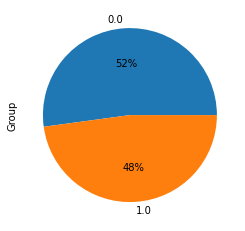

In [ ]:
titanic['Group'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')

Como se puede observar, 48% de los pasajeros abordaron acompañados de otro pasajero al Titanic.

In [ ]:
not_group = titanic[titanic['Group'].isin([0])]
in_group = titanic[titanic['Group'].isin([1])]
not_group = not_group['Survived'].value_counts(normalize=True)
in_group = in_group['Survived'].value_counts(normalize=True)

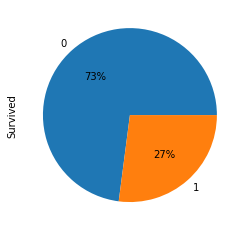

In [ ]:
not_group.plot(kind='pie', autopct='%1.0f%%')

73% de los pasajeros que abordaron solos el Titanic no lograron sobrevivir. Es decir, el 73% del 52% del total de pasajeros no logró sobrevivir y justo coincide que toda esta proporción abordó sola el Titanic.

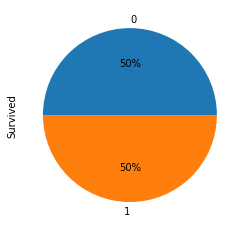

In [ ]:
in_group.plot(kind='pie', autopct='%1.0f%%')

Por otra parte, la mitad de los pasajeros que abordaron acompañados de alguien más el Titanic, lograron sobrevivir. Una cifra que indica que de las personas que abordaron acompañadas, la supervivencia fue el doble comparado a las personas que abordaron solas.

In [ ]:
titanic_alone = titanic[titanic['Group'].isin([0])]
titanic_with_friends = titanic[titanic['Group'].isin([1])]

from scipy.stats import ttest_ind

alone_mean = titanic_alone["Survived"].mean()
friends_mean = titanic_with_friends["Survived"].mean()

print("Alone survivement mean value:",alone_mean)
print("Friends survivement mean value:",friends_mean)

alone_std = titanic_alone["Survived"].std()
friends_std = titanic_with_friends["Survived"].std()
print("Alone survivement std value:",alone_std)
print("Friends survivement std value:",friends_std)

ttest,pval = ttest_ind(titanic_alone["Survived"],titanic_with_friends["Survived"])

print("p-value",pval)
if pval <0.05:
  print("Se rechaza la hipótesis nula (las medias son diferentes estadisticamente con un 95% de confianza)")
else:
  print("No se rechaza la hipótesis nula (las medias son iguales estadisticamente con un 95% de confianza)")

Alone survivement mean value: 0.27056277056277056
Friends survivement mean value: 0.5
Alone survivement std value: 0.4447321299590394
Friends survivement std value: 0.5005906676601786
p-value 1.093814468879732e-12
Se rechaza la hipótesis nula (las medias son diferentes estadisticamente con un 95% de confianza)


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 890
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  886 non-null    int64   
 1   Pclass    886 non-null    int64   
 2   Sex       886 non-null    float64 
 3   Age       886 non-null    float64 
 4   Fare      886 non-null    float64 
 5   C         886 non-null    uint8   
 6   Q         886 non-null    uint8   
 7   S         886 non-null    uint8   
 8   Group     886 non-null    float64 
 9   Master    886 non-null    uint8   
 10  Miss      886 non-null    uint8   
 11  Mr        886 non-null    uint8   
 12  Mrs       886 non-null    uint8   
 13  AgeGroup  886 non-null    category
dtypes: category(1), float64(4), int64(2), uint8(7)
memory usage: 88.0 KB


# Creación y evaluación de modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
train = limpieza_datos(pd.read_csv("train.csv"), train=True)
train_X = train.drop(['Survived'], axis=1)
train_Y = train['Survived']

test_X = limpieza_datos(pd.read_csv("test.csv"), train=False)
test_Y = pd.read_csv("test_perfecto.csv")["Survived"]

In [ ]:
def concat_test_pred(test_Y, y_pred):
    
    df_test = test_Y.to_frame(name='Titanic').reset_index().drop(columns='index')
    df_pred = pd.Series(y_pred).to_frame(name='Prediction')
    results = pd.concat([df_test, df_pred], axis=1)
    
    return results

def performance_metrics(results):
    
    positives = results[['Titanic', 'Prediction']][results['Titanic'] == 1]
    negatives = results[['Titanic', 'Prediction']][results['Titanic'] == 0]
    
    true_negatives = negatives[negatives['Titanic'] == negatives['Prediction']].shape[0]
    false_positives = negatives[negatives['Titanic'] != negatives['Prediction']].shape[0]
    true_positives = positives[positives['Titanic'] == positives['Prediction']].shape[0]
    false_negatives = positives[positives['Titanic'] != positives['Prediction']].shape[0]
    
    confusion_matrix = {'actual positives' : [true_positives, false_negatives], 
                        'actual negatives' : [false_positives, true_negatives]}
    
    confusion_matrix_df = pd.DataFrame.from_dict(confusion_matrix, orient='index', 
                                                 columns=['predicted positives', 'predicted negatives'])
    
    accuracy = (true_positives + true_negatives) / (true_positives + false_positives +  true_negatives + false_negatives)
    precission = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precission * recall) / (precission + recall)
    
    metrics = {'Accuracy' : accuracy, 'Precission' : precission, 'Recall' : recall, 'F1 Score' : f1_score}
    
    metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Metrics'])
    
    return confusion_matrix_df, metrics_df  

def modelos(test_X, train_X):

  # modelos
  tree_model = tree.DecisionTreeClassifier().fit(train_X, train_Y)
  y_pred_tree = tree_model.predict(test_X)

  random_model = RandomForestClassifier().fit(train_X, train_Y)
  y_pred_rand = random_model.predict(test_X)

  xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='error').fit(train_X, train_Y)
  y_pred_xgb = xgb_model.predict(test_X)

  svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(train_X, train_Y)
  y_pred_svm = svm_model.predict(test_X)

  logistic_model = LogisticRegression(max_iter = 1000).fit(train_X, train_Y)
  y_pred_log = logistic_model.predict(test_X)

  # generación de archivos
  results_tree = [pd.read_csv("gender_submission.csv")['PassengerId'], y_pred_tree]
  submission_tree = pd.DataFrame(results_tree).transpose()
  submission_tree = submission_tree.astype(int)
  submission_tree.columns = ['PassengerId', 'Survived']
  submission_tree.to_csv("Results/results_tree.csv",index = False)
  
  results_randomforest = [pd.read_csv("gender_submission.csv")['PassengerId'], y_pred_rand]
  submission_randomforest = pd.DataFrame(results_randomforest).transpose()
  submission_randomforest = submission_randomforest.astype(int)
  submission_randomforest.columns = ['PassengerId', 'Survived']
  submission_randomforest.to_csv("Results/results_randomforest.csv",index = False)

  results_XGB = [pd.read_csv("gender_submission.csv")['PassengerId'], y_pred_xgb]
  submission_xgb = pd.DataFrame(results_XGB).transpose()
  submission_xgb = submission_xgb.astype(int)
  submission_xgb.columns = ['PassengerId', 'Survived']
  submission_xgb.to_csv("Results/results_XGB.csv",index = False)

  results_svm = [pd.read_csv("gender_submission.csv")['PassengerId'], y_pred_svm]
  submission_svm = pd.DataFrame(results_svm).transpose()
  submission_svm = submission_svm.astype(int)
  submission_svm.columns = ['PassengerId', 'Survived']
  submission_svm.to_csv("Results/results_svm.csv",index = False)

  results_log = [pd.read_csv("gender_submission.csv")['PassengerId'], y_pred_log]
  submission_log = pd.DataFrame(results_log).transpose()
  submission_log = submission_log.astype(int)
  submission_log.columns = ['PassengerId', 'Survived']
  submission_log.to_csv("Results/results_log.csv",index = False)

  return y_pred_tree, y_pred_rand, y_pred_xgb, y_pred_svm, y_pred_log

def evaluate(y_pred, test_Y, name):
  results = concat_test_pred(test_Y, y_pred)
  confusion_matrix, metrics = performance_metrics(results)
  print(name+":")
  print(metrics,"\n")
  return

In [ ]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 890
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  886 non-null    int64  
 1   Sex     886 non-null    float64
 2   Age     886 non-null    float64
 3   Fare    886 non-null    float64
 4   C       886 non-null    uint8  
 5   Q       886 non-null    uint8  
 6   S       886 non-null    uint8  
 7   Group   886 non-null    float64
 8   Master  886 non-null    uint8  
 9   Miss    886 non-null    uint8  
 10  Mr      886 non-null    uint8  
 11  Mrs     886 non-null    uint8  
dtypes: float64(4), int64(1), uint8(7)
memory usage: 47.6 KB


In [ ]:
y_pred_tree, y_pred_rand, y_pred_xgb, y_pred_svm, y_pred_log = modelos(test_X, train_X)
evaluate(y_pred_tree, test_Y, "Decision tree")
evaluate(y_pred_rand, test_Y, "Random forest")
evaluate(y_pred_xgb, test_Y, "XGB")
evaluate(y_pred_svm, test_Y, "SVM")
evaluate(y_pred_log, test_Y, "Logistic regression")

Decision tree:
             Metrics
Accuracy    0.739234
Precission  0.643275
Recall      0.696203
F1 Score    0.668693 

Random forest:
             Metrics
Accuracy    0.753589
Precission  0.677419
Recall      0.664557
F1 Score    0.670927 

XGB:
             Metrics
Accuracy    0.760766
Precission  0.693333
Recall      0.658228
F1 Score    0.675325 

SVM:
             Metrics
Accuracy    0.777512
Precission  0.748092
Recall      0.620253
F1 Score    0.678201 

Logistic regression:
             Metrics
Accuracy    0.782297
Precission  0.708075
Recall      0.721519
F1 Score    0.714734 



In [ ]:
scaler_train = preprocessing.MinMaxScaler().fit(train_X)

train_X_scaled = pd.DataFrame(scaler_train.transform(train_X))
test_X_scaled = pd.DataFrame(scaler_train.transform(test_X))

In [ ]:
test_X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.428248,0.029769,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.585323,0.026616,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.5,0.0,0.773813,0.036835,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.334004,0.032937,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.271174,0.046721,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,0.363675,0.030608,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
414,1.0,1.0,0.484795,0.414068,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
415,0.0,0.0,0.478512,0.027567,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
416,0.0,0.0,0.363675,0.030608,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
test_X_scaled[test_X_scaled.select_dtypes(np.float64).columns] = test_X_scaled.select_dtypes(np.float64).astype(np.float16)
train_X_scaled[train_X_scaled.select_dtypes(np.float64).columns] = train_X_scaled.select_dtypes(np.float64).astype(np.float16)

In [ ]:
train_X.describe()

,Pclass,Sex,Age,Fare,C,Q,S,Group,Master,Miss,Mr,Mrs
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,1.683973,0.351016,29.522330,30.470611,0.186230,0.086907,0.726862,0.478555,0.045147,0.207675,0.604966,0.142212
std,0.832607,0.477557,13.679015,41.155721,0.389512,0.281858,0.445823,0.499822,0.207743,0.405872,0.489134,0.349465
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,29.361283,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,1.000000,37.000000,30.646850,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,1.000000,80.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_X_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,0.342041,0.351074,0.365723,0.115845,0.186279,0.086914,0.727051,0.478516,0.045135,0.207642,0.604980,0.142212
std,0.416504,0.477539,0.171875,0.156494,0.389404,0.281738,0.446045,0.499756,0.207764,0.406006,0.489258,0.349365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.258545,0.030029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.363770,0.054962,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.500000,1.000000,0.459717,0.116516,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_X_scaled = train_X_scaled.fillna(0)
train_X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       886 non-null    float16
 1   1       886 non-null    float16
 2   2       886 non-null    float16
 3   3       886 non-null    float16
 4   4       886 non-null    float16
 5   5       886 non-null    float16
 6   6       886 non-null    float16
 7   7       886 non-null    float16
 8   8       886 non-null    float16
 9   9       886 non-null    float16
 10  10      886 non-null    float16
 11  11      886 non-null    float16
dtypes: float16(12)
memory usage: 20.9 KB


In [ ]:
test_X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       418 non-null    float16
 1   1       418 non-null    float16
 2   2       418 non-null    float16
 3   3       418 non-null    float16
 4   4       418 non-null    float16
 5   5       418 non-null    float16
 6   6       418 non-null    float16
 7   7       418 non-null    float16
 8   8       418 non-null    float16
 9   9       418 non-null    float16
 10  10      418 non-null    float16
 11  11      418 non-null    float16
dtypes: float16(12)
memory usage: 9.9 KB


In [ ]:
y_pred_tree_scaled, y_pred_rand_scaled, y_pred_xgb_scaled, y_pred_svm_scaled, y_pred_log_scaled = modelos(test_X_scaled, train_X_scaled)

evaluate(y_pred_tree_scaled, test_Y, "Decision tree (scaled)")
evaluate(y_pred_rand_scaled, test_Y, "Random forest (scaled)")
evaluate(y_pred_xgb_scaled, test_Y, "XGB (scaled)")
evaluate(y_pred_svm_scaled, test_Y, "SVM (scaled)")
evaluate(y_pred_log_scaled, test_Y, "Logistic regression (scaled)")

Decision tree (scaled):
             Metrics
Accuracy    0.736842
Precission  0.644578
Recall      0.677215
F1 Score    0.660494 

Random forest (scaled):
             Metrics
Accuracy    0.755981
Precission  0.684211
Recall      0.658228
F1 Score    0.670968 

XGB (scaled):
             Metrics
Accuracy    0.763158
Precission  0.697987
Recall      0.658228
F1 Score    0.677524 

SVM (scaled):
             Metrics
Accuracy    0.753589
Precission  0.658960
Recall      0.721519
F1 Score    0.688822 

Logistic regression (scaled):
             Metrics
Accuracy    0.782297
Precission  0.705521
Recall      0.727848
F1 Score    0.716511 



## Modelo con Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
train_X_scaled.shape

(886, 12)

In [ ]:
# Crear el modelo
model_tf = tf.keras.Sequential()
model_tf.add(tf.keras.layers.Dense(units = 5, activation = "relu", input_dim = train_X_scaled.shape[1]))
model_tf.add(tf.keras.layers.Dropout(0.25))
#model_tf.add(tf.keras.layers.Dense(units = 6, activation = "relu"))
#model_tf.add(tf.keras.layers.Dropout(0.25))
model_tf.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

In [ ]:

# Compilar el modelo
model_tf.compile(
    optimizer = tf.keras.optimizers.SGD(
        learning_rate=0.001,
        momentum=0.9,
        nesterov=False,
        name='SGD',
    ),
    loss = "binary_crossentropy",
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)

In [ ]:
batch_size = 32
# Entrenar el modelo
print('Inicio del entrenamiento')
historia = model_tf.fit(
    train_X_scaled, 
    train_Y, 
    epochs = 1000, 
    verbose = 2, 
    steps_per_epoch = len(train_X)/batch_size,
    validation_data= (test_X_scaled, test_Y)
)
print("Modelo entrenado")

Inicio del entrenamiento
Epoch 1/1000
27/27 - 1s - loss: 0.6665 - binary_accuracy: 0.5982 - val_loss: 0.6315 - val_binary_accuracy: 0.6818 - 757ms/epoch - 27ms/step
Epoch 2/1000
27/27 - 0s - loss: 0.6531 - binary_accuracy: 0.6275 - val_loss: 0.6170 - val_binary_accuracy: 0.6938 - 61ms/epoch - 2ms/step
Epoch 3/1000
27/27 - 0s - loss: 0.6213 - binary_accuracy: 0.6670 - val_loss: 0.6048 - val_binary_accuracy: 0.7010 - 57ms/epoch - 2ms/step
Epoch 4/1000
27/27 - 0s - loss: 0.6015 - binary_accuracy: 0.6885 - val_loss: 0.5956 - val_binary_accuracy: 0.7153 - 56ms/epoch - 2ms/step
Epoch 5/1000
27/27 - 0s - loss: 0.6053 - binary_accuracy: 0.6727 - val_loss: 0.5868 - val_binary_accuracy: 0.7201 - 47ms/epoch - 2ms/step
Epoch 6/1000
27/27 - 0s - loss: 0.5843 - binary_accuracy: 0.6874 - val_loss: 0.5794 - val_binary_accuracy: 0.7297 - 59ms/epoch - 2ms/step
Epoch 7/1000
27/27 - 0s - loss: 0.5830 - binary_accuracy: 0.6975 - val_loss: 0.5732 - val_binary_accuracy: 0.7416 - 45ms/epoch - 2ms/step
Epoch 8

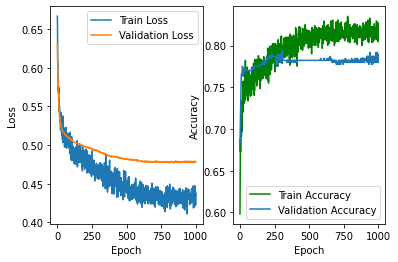

In [ ]:
# Graficar la pérdida
plt.subplot(1, 2, 1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(historia.history["loss"], label='Train Loss')
plt.plot(historia.history["val_loss"], label='Validation Loss')
plt.legend()

# Graficar el accuracy
plt.subplot(1, 2, 2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(historia.history["binary_accuracy"], color = "green", label='Train Accuracy')
plt.plot(historia.history["val_binary_accuracy"], label='Validation Accuracy')

plt.legend()
plt.show()


In [ ]:
evaluate = model_tf.evaluate(test_X_scaled, test_Y)
print(evaluate)

14/14 [==============================] - 0s 2ms/step - loss: 0.4786 - binary_accuracy: 0.7895
[0.47858184576034546, 0.7894737124443054]


# Tensorflow Model RMSprop

In [ ]:
train_X_scaled = pd.DataFrame(scaler_train.transform(train_X)).to_numpy()
test_X_scaled = pd.DataFrame(scaler_train.transform(test_X)).to_numpy()

In [ ]:
train_Y = tf.one_hot(train_Y, tf.constant(2))
test_Y = tf.one_hot(test_Y, tf.constant(2))
train_Y

<tf.Tensor: shape=(886, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)>

In [ ]:
input_dim = train_X_scaled.shape[1]
input_dim

12

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(input_dim,)))
model.add(tf.keras.layers.Dense(units=8, activation="relu", kernel_initializer=tf.keras.initializers.HeUniform()))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=2, activation="softmax", kernel_initializer=tf.keras.initializers.GlorotNormal()))

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(
        learning_rate=0.001,
        rho=0.9,
        momentum=0.999,
        epsilon=1e-07,
        centered=False,
        name='RMSprop'
    ),
    loss="categorical_crossentropy",
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 104       
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 32
history = model.fit(train_X_scaled, train_Y, 
    epochs=120, 
    steps_per_epoch=len(train_X_scaled)/batch_size, 
    verbose=2,
    validation_split=0.1
)

Epoch 1/120
27/27 - 0s - loss: 0.5489 - categorical_accuracy: 0.7629 - val_loss: 0.5409 - val_categorical_accuracy: 0.7640 - 394ms/epoch - 14ms/step
Epoch 2/120
27/27 - 0s - loss: 0.6496 - categorical_accuracy: 0.7591 - val_loss: 0.4638 - val_categorical_accuracy: 0.8315 - 41ms/epoch - 1ms/step
Epoch 3/120
27/27 - 0s - loss: 0.5477 - categorical_accuracy: 0.7340 - val_loss: 0.4776 - val_categorical_accuracy: 0.8652 - 35ms/epoch - 1ms/step
Epoch 4/120
27/27 - 0s - loss: 0.5586 - categorical_accuracy: 0.7240 - val_loss: 0.4729 - val_categorical_accuracy: 0.8764 - 35ms/epoch - 1ms/step
Epoch 5/120
27/27 - 0s - loss: 0.5018 - categorical_accuracy: 0.7654 - val_loss: 0.3782 - val_categorical_accuracy: 0.8764 - 56ms/epoch - 2ms/step
Epoch 6/120
27/27 - 0s - loss: 0.4822 - categorical_accuracy: 0.8018 - val_loss: 0.3748 - val_categorical_accuracy: 0.8427 - 45ms/epoch - 2ms/step
Epoch 7/120
27/27 - 0s - loss: 0.4691 - categorical_accuracy: 0.8043 - val_loss: 0.4165 - val_categorical_accuracy: 

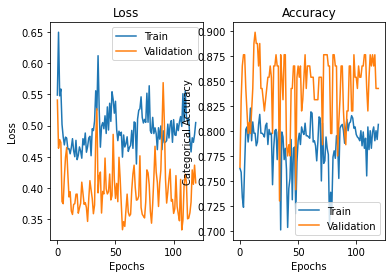

In [ ]:
plt.subplot(1, 2, 1)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Categorical Accuracy")
plt.plot(history.history["categorical_accuracy"], label="Train")
plt.plot(history.history["val_categorical_accuracy"], label="Validation")
plt.legend()

In [ ]:
evaluate = model.evaluate(test_X_scaled, test_Y)
print("Model Categorical Test Accuracy:", evaluate[1])

14/14 [==============================] - 0s 1ms/step - loss: 0.5897 - categorical_accuracy: 0.7919
Model Categorical Test Accuracy: 0.7918660044670105


In [ ]:
y_pred_nn = model.predict(test_X_scaled)
# From one_hot encoding to 0 or 1
y_pred_nn = tf.argmax(y_pred_nn, axis=1).numpy()

In [ ]:
results_nn = [pd.read_csv("test.csv")['PassengerId'], y_pred_nn]
submission_nn = pd.DataFrame(results_nn)
submission_nn = pd.DataFrame(results_nn).transpose()
submission_nn.columns = ['PassengerId', 'Survived']
# submission_nn.to_csv("Results/results_nn.csv",index = False)